## Drawing Scatter Plots for High-Correlation Residues in S01
* The target high-correlation residue pairs are: lys90-asp34(-0.9280), glu166-his172(-0.9112), asp340-lys396(-0.9290), his478-glu472(-0.8237), arg585-asp522(-0.8191) and asp459-lys408(-0.9202).

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# path names
root = Path().resolve()
path = root/'dataset'/'Henry_Mpro_pKa'


# the function to read data
def read_data(name):
    table_data = pd.DataFrame({})
    dataset_path = path/name
    for dp in dataset_path.iterdir():
        # structure.pdb does not need to be read here
        if dp.name != 'structure.pdb':
            temp_table = pd.read_table(dp, header=None, names=['#1', '#2'])
            temp_array = (list)(temp_table['#2'])
            table_data[dp.name] = temp_array
            warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    return table_data


# the function to perform pearson correlation analysis
def get_high_corr_features(table):
    corr_matrix = table.corr(method='pearson')
    threshold = 0.8

    corr_pairs = corr_matrix.stack().reset_index()
    corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    corr_features = corr_pairs[
        (corr_pairs['Correlation'].abs() > threshold) &
        (corr_pairs['Feature1'] != corr_pairs['Feature2'])
    ].sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

    feature_1_array = (list)(corr_features['Feature1'])
    feature_2_array = (list)(corr_features['Feature2'])

    high_features_array = list(set(feature_1_array + feature_2_array))

    return corr_matrix, corr_features, high_features_array

In [3]:
S01_table = read_data(name='S01')
S01_corr_matrix, S01_corr_features, S01_high_features_array = get_high_corr_features(S01_table)
print("The High-Correlation Pairs and Related Values of Correlation:")
print(S01_corr_features)

The High-Correlation Pairs and Related Values of Correlation:
      Feature1 Feature2  Correlation
7513   ASP_522  ARG_585    -0.819075
15275  GLU_472  HIS_478    -0.823668
9767   HIS_172  GLU_166    -0.911223
2991   ASP_459  LYS_408    -0.920242
6115    ASP_34   LYS_90    -0.927971
18950  LYS_396  ASP_340    -0.929024


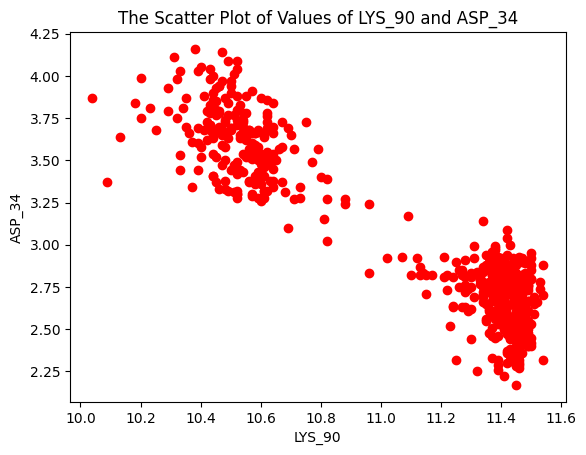

In [4]:
lys90_values = list(S01_table["LYS_90"])
asp34_values = list(S01_table["ASP_34"])

# draw the scatter plot between LYS_90 and ASP_34
plt.scatter(lys90_values, asp34_values, color='red')
plt.xlabel("LYS_90")
plt.ylabel("ASP_34")
plt.title("The Scatter Plot of Values of LYS_90 and ASP_34")
plt.savefig('./figure/scatter/LYS90_ASP34.png')
plt.show()

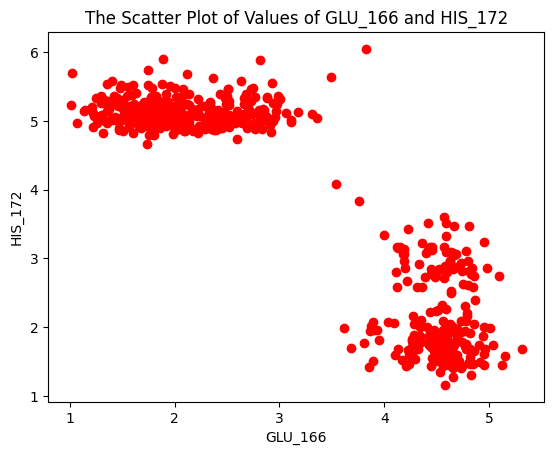

In [5]:
glu166_values = list(S01_table["GLU_166"])
his172_values = list(S01_table["HIS_172"])
# draw the scatter plot between GLU_166 and HIS_172
plt.scatter(glu166_values, his172_values, color='red')
plt.xlabel("GLU_166")
plt.ylabel("HIS_172")
plt.title("The Scatter Plot of Values of GLU_166 and HIS_172")
plt.savefig('./figure/scatter/GLU166_HIS172.png')
plt.show()

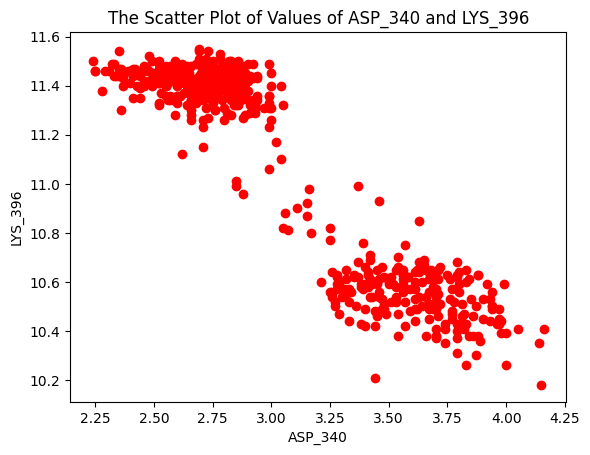

In [6]:
asp340_values = list(S01_table["ASP_340"])
lys396_values = list(S01_table["LYS_396"])
# draw the scatter plot between ASP_340 and LYS_396
plt.scatter(asp340_values, lys396_values, color='red')
plt.xlabel("ASP_340")
plt.ylabel("LYS_396")
plt.title("The Scatter Plot of Values of ASP_340 and LYS_396")
plt.savefig('./figure/scatter/ASP340_LYS396.png')
plt.show()

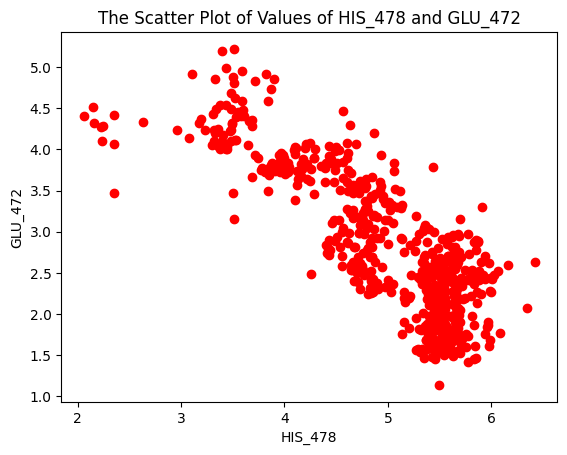

In [7]:
his478_values = list(S01_table["HIS_478"])
glu472_values = list(S01_table["GLU_472"])
# draw the scatter plot between HIS_478 and GLU_472
plt.scatter(his478_values, glu472_values, color='red')
plt.xlabel("HIS_478")
plt.ylabel("GLU_472")
plt.title("The Scatter Plot of Values of HIS_478 and GLU_472")
plt.savefig('./figure/scatter/HIS478_GLU472.png')
plt.show()

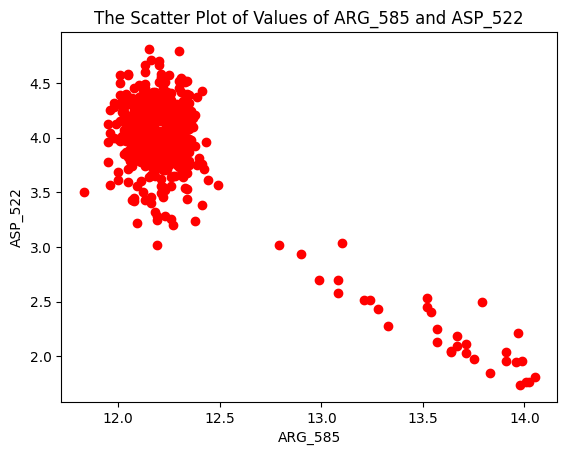

In [8]:
arg585_values = list(S01_table["ARG_585"])
asp522_values = list(S01_table["ASP_522"])
# draw the scatter plot between ARG_585 and ASP_522
plt.scatter(arg585_values, asp522_values, color='red')
plt.xlabel("ARG_585")
plt.ylabel("ASP_522")
plt.title("The Scatter Plot of Values of ARG_585 and ASP_522")
plt.savefig('./figure/scatter/ARG585_ASP522.png')
plt.show()

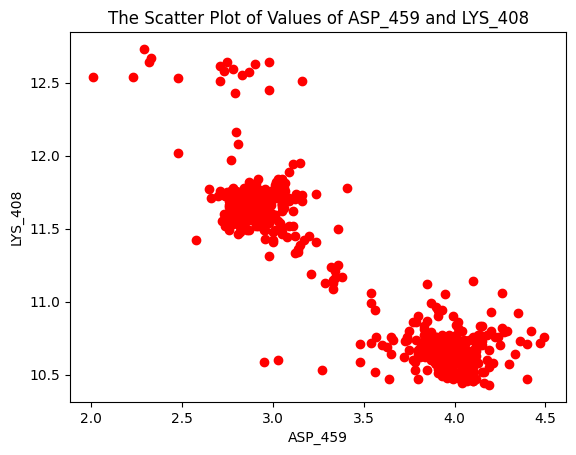

In [9]:
asp459_values = list(S01_table["ASP_459"])
lys408_values = list(S01_table["LYS_408"])
# draw the scatter plot between ASP_459 and LYS_408
plt.scatter(asp459_values, lys408_values, color='red')
plt.xlabel("ASP_459")
plt.ylabel("LYS_408")
plt.title("The Scatter Plot of Values of ASP_459 and LYS_408")
plt.savefig('./figure/scatter/ASP459_LYS408.png')
plt.show()

* Try to perform linear regression on the data sets.

The linear regression function of LYS90 and ASP34 is: ASP34 = -1.070114 * LYS90 + 14.880070
The mean squared error of linear regression is:  0.03590797440729275


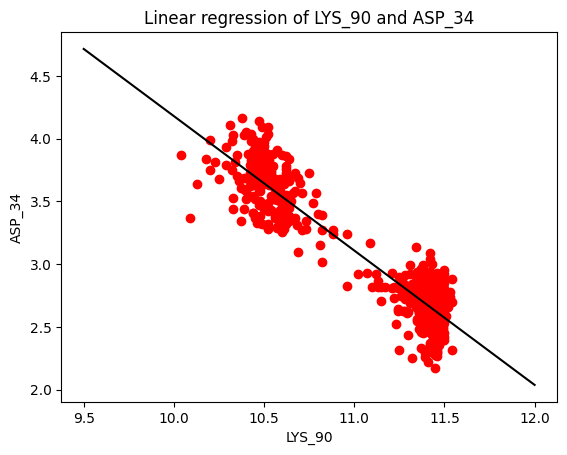

In [10]:
lys90_list = [[element] for element in lys90_values]
asp34_list = [[element] for element in asp34_values]

lys90_train, lys90_test, asp34_train, asp34_test = train_test_split(lys90_list, asp34_list, random_state=42)
lys90_asp34_model = LinearRegression()
lys90_asp34_model.fit(lys90_train, asp34_train)
lys90_asp34_coef = lys90_asp34_model.coef_
lys90_asp34_intercept = lys90_asp34_model.intercept_
asp34_predict = lys90_asp34_model.predict(lys90_test)
asp34_error = mean_squared_error(asp34_test, asp34_predict)

print("The linear regression function of LYS90 and ASP34 is: ASP34 = %f * LYS90 + %f"
      % (lys90_asp34_coef[0][0], lys90_asp34_intercept[0]))
print("The mean squared error of linear regression is: ", asp34_error)

# PLot the result of Linear Regression
plt.scatter(lys90_values, asp34_values, color='red')
lys90_range = [[9.5], [10.5], [11.5], [12]]
asp34_range = lys90_asp34_model.predict(lys90_range)
plt.plot(lys90_range, asp34_range, color='black', linestyle='-')
plt.xlabel("LYS_90")
plt.ylabel("ASP_34")
plt.title("Linear regression of LYS_90 and ASP_34")
plt.savefig('./figure/LR/LYS90_ASP34_LR.png')
plt.show()

The linear regression function of GLU166 and HIS172 is: HIS172 = -1.056380 * GLU166 + 7.114287
The mean squared error of linear regression is:  0.4739383861777232


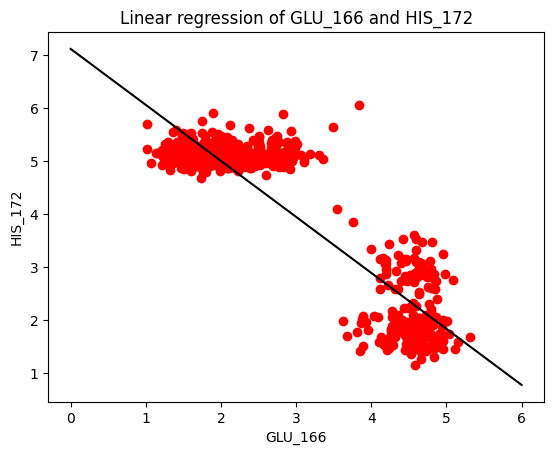

In [11]:
def Linear_Regression(x_values, y_values):
    x_list = [[element] for element in x_values]
    y_list = [[element] for element in y_values]

    x_train, x_test, y_train, y_test = train_test_split(x_list, y_list, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    error = mean_squared_error(y_test, y_predict)

    return model, error


glu166_his172_model, his172_error = Linear_Regression(glu166_values, his172_values)
glu166_his172_coef = glu166_his172_model.coef_
glu166_his172_intercept = glu166_his172_model.intercept_
print("The linear regression function of GLU166 and HIS172 is: HIS172 = %f * GLU166 + %f"
      % (glu166_his172_coef[0][0], glu166_his172_intercept[0]))
print("The mean squared error of linear regression is: ", his172_error)

# PLot the result of Linear Regression
plt.scatter(glu166_values, his172_values, color='red')
glu166_range = [[0], [2], [4], [6]]
his172_range = glu166_his172_model.predict(glu166_range)
plt.plot(glu166_range, his172_range, color='black', linestyle='-')
plt.xlabel("GLU_166")
plt.ylabel("HIS_172")
plt.title("Linear regression of GLU_166 and HIS_172")
plt.savefig('./figure/LR/GLU166_HIS172_LR.png')
plt.show()

The linear regression function of ASP340 and LYS396 is: LYS396 = -0.835122 * ASP340 + 13.624541
The mean squared error of linear regression is:  0.024756975816265372


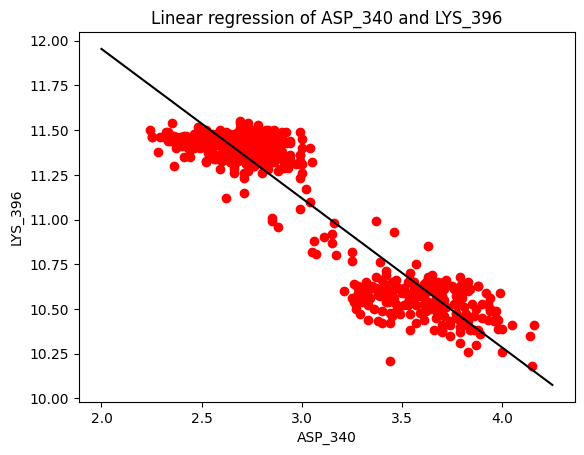

In [12]:
asp340_lys396_model, lys396_error = Linear_Regression(asp340_values, lys396_values)
asp340_lys396_coef = asp340_lys396_model.coef_
asp340_lys396_intercept = asp340_lys396_model.intercept_
print("The linear regression function of ASP340 and LYS396 is: LYS396 = %f * ASP340 + %f"
      % (asp340_lys396_coef[0][0], asp340_lys396_intercept[0]))
print("The mean squared error of linear regression is: ", lys396_error)

# PLot the result of Linear Regression
plt.scatter(asp340_values, lys396_values, color='red')
asp340_range = [[2], [3], [4], [4.25]]
lys396_range = asp340_lys396_model.predict(asp340_range)
plt.plot(asp340_range, lys396_range, color='black', linestyle='-')
plt.xlabel("ASP_340")
plt.ylabel("LYS_396")
plt.title("Linear regression of ASP_340 and LYS_396")
plt.savefig('./figure/LR/ASP340_LYS396_LR.png')
plt.show()

The linear regression function of HIS478 and GLU472 is: GLU472 = -0.894355 * HIS478 + 7.260807
The mean squared error of linear regression is:  0.28322814374095123


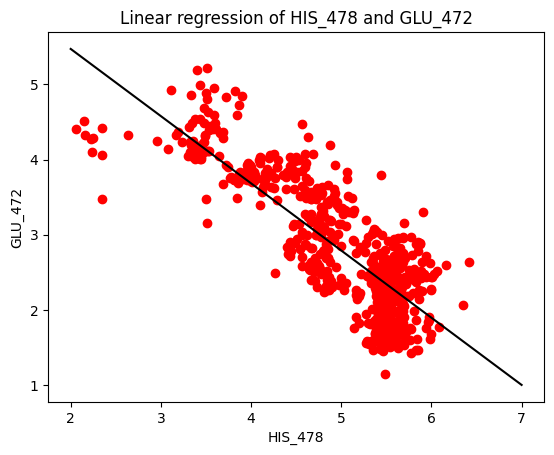

In [13]:
his478_glu472_model, glu472_error = Linear_Regression(his478_values, glu472_values)
his478_glu472_coef = his478_glu472_model.coef_
his478_glu472_intercept = his478_glu472_model.intercept_
print("The linear regression function of HIS478 and GLU472 is: GLU472 = %f * HIS478 + %f"
      % (his478_glu472_coef[0][0], his478_glu472_intercept[0]))
print("The mean squared error of linear regression is: ", glu472_error)

# PLot the result of Linear Regression
plt.scatter(his478_values, glu472_values, color='red')
his478_range = [[2], [4], [6], [7]]
glu472_range = his478_glu472_model.predict(his478_range)
plt.plot(his478_range, glu472_range, color='black', linestyle='-')
plt.xlabel("HIS_478")
plt.ylabel("GLU_472")
plt.title("Linear regression of HIS_478 and GLU_472")
plt.savefig('./figure/LR/HIS478_GLU472_LR.png')
plt.show()

The linear regression function of ARG585 and ASP522 is: ASP522 = -1.178230 * ARG585 + 18.367589
The mean squared error of linear regression is:  0.08856534098762825


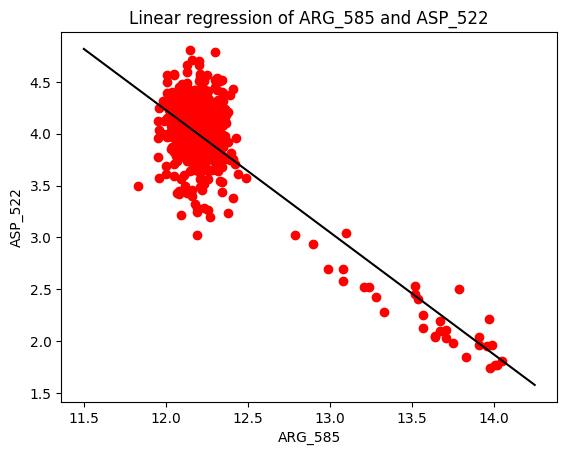

In [14]:
arg585_asp522_model, asp522_error = Linear_Regression(arg585_values, asp522_values)
arg585_asp522_coef = arg585_asp522_model.coef_
arg585_asp522_intercept = arg585_asp522_model.intercept_
print("The linear regression function of ARG585 and ASP522 is: ASP522 = %f * ARG585 + %f"
      % (arg585_asp522_coef[0][0], arg585_asp522_intercept[0]))
print("The mean squared error of linear regression is: ", asp522_error)

# PLot the result of Linear Regression
plt.scatter(arg585_values, asp522_values, color='red')
arg585_range = [[11.5], [12.5], [13.5], [14.25]]
asp522_range = arg585_asp522_model.predict(arg585_range)
plt.plot(arg585_range, asp522_range, color='black', linestyle='-')
plt.xlabel("ARG_585")
plt.ylabel("ASP_522")
plt.title("Linear regression of ARG_585 and ASP_522")
plt.savefig('./figure/LR/ARG585_ASP522_LR.png')
plt.show()

The linear regression function of ASP459 and LYS408 is: LYS408 = -0.918368 * ASP459 + 14.340839
The mean squared error of linear regression is:  0.041115622491692386


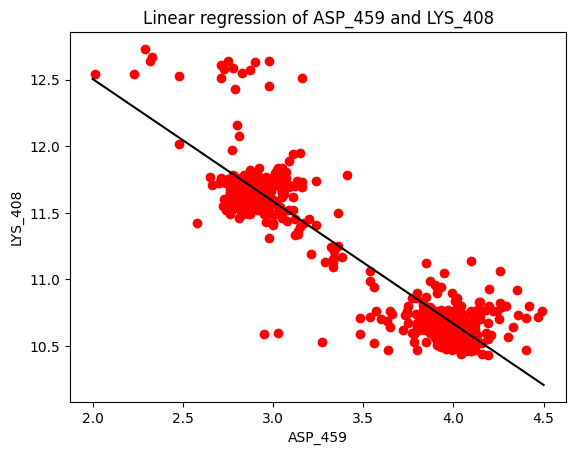

In [15]:
asp459_lys408_model, lys408_error = Linear_Regression(asp459_values, lys408_values)
asp459_lys408_coef = asp459_lys408_model.coef_
asp459_lys408_intercept = asp459_lys408_model.intercept_
print("The linear regression function of ASP459 and LYS408 is: LYS408 = %f * ASP459 + %f"
      % (asp459_lys408_coef[0][0], asp459_lys408_intercept[0]))
print("The mean squared error of linear regression is: ", lys408_error)

# PLot the result of Linear Regression
plt.scatter(asp459_values, lys408_values, color='red')
asp459_range = [[2], [3], [4], [4.5]]
lys408_range = asp459_lys408_model.predict(asp459_range)
plt.plot(asp459_range, lys408_range, color='black', linestyle='-')
plt.xlabel("ASP_459")
plt.ylabel("LYS_408")
plt.title("Linear regression of ASP_459 and LYS_408")
plt.savefig('./figure/LR/ASP459_LYS408_LR.png')
plt.show()

In [18]:
S01_data = {'x': ['LYS90', 'GLU166', 'ASP340', 'HIS478', 'ARG585', 'ASP459'],
            'y': ['ASP34', 'HIS172', 'LYS396', 'GLU472', 'ASP522', 'LYS408'],
            'coefficient': [lys90_asp34_coef[0][0], glu166_his172_coef[0][0], asp340_lys396_coef[0][0],
                            his478_glu472_coef[0][0], arg585_asp522_coef[0][0], asp459_lys408_coef[0][0]],
            'intercept': [lys90_asp34_intercept[0], glu166_his172_intercept[0], asp340_lys396_intercept[0],
                          his478_glu472_intercept[0], arg585_asp522_intercept[0], asp459_lys408_intercept[0]],
            'mean squared error': [asp34_error, his172_error, lys396_error,
                                   glu472_error, asp522_error, lys408_error]}
S01_linear_regression_results = pd.DataFrame(S01_data)
S01_linear_regression_results

,x,y,coefficient,intercept,mean squared error
0,LYS90,ASP34,-1.070114,14.880070,0.035908
1,GLU166,HIS172,-1.056380,7.114287,0.473938
2,ASP340,LYS396,-0.835122,13.624541,0.024757
3,HIS478,GLU472,-0.894355,7.260807,0.283228
4,ARG585,ASP522,-1.178230,18.367589,0.088565
5,ASP459,LYS408,-0.918368,14.340839,0.041116


In [19]:
S01_linear_regression_results.to_csv('./processed/LR/S01_linear_regression_results.csv', index=False)